In [291]:
import requests
import zipfile
from io import BytesIO
import os

def download_and_extract(url, specific_file=None):
    # Faz o download do arquivo ZIP
    response = requests.get(url)
    if response.status_code == 200:
        print(f'Download concluído com sucesso para {url}')
        with zipfile.ZipFile(BytesIO(response.content)) as thezip:
            if specific_file:
                # Extrai apenas o arquivo específico se fornecido
                all_files = thezip.namelist()
                for file in all_files:
                    if specific_file in file:
                        thezip.extract(file, '.')  # Extrai na pasta atual
                        print(f'Arquivo {file} extraído com sucesso!')
            else:
                # Extrai todos os arquivos se nenhum específico for fornecido
                thezip.extractall('.')
                print('Todos os arquivos foram extraídos com sucesso.')
    else:
        print(f'Erro no download do arquivo de {url}. Status Code: {response.status_code}')

def delete_file(filename):
    # Verifica se existe o arquivo
    if os.path.exists(filename):
        # Remove o arquivo 
        os.remove(filename)
        print(f'Arquivo {filename} apagado com sucesso.')
    else:
        print(f'Arquivo {filename} não encontrado.')

# Urls dos arquivos
urls_and_files = [
    ('https://cdn.tse.jus.br/estatistica/sead/odsele/consulta_cand/consulta_cand_2020.zip', 'consulta_cand_2020_PB.csv'),
    ('https://cdn.tse.jus.br/estatistica/sead/odsele/votacao_secao/votacao_secao_2020_PB.zip', None)
]

# Executa a função para cada URL e arquivo específico
for url, file_to_extract in urls_and_files:
    download_and_extract(url, file_to_extract)

# Apaga o arquivo leiame.pdf 
delete_file('leiame.pdf')



Download concluído com sucesso para https://cdn.tse.jus.br/estatistica/sead/odsele/consulta_cand/consulta_cand_2020.zip
Arquivo consulta_cand_2020_PB.csv extraído com sucesso!
Download concluído com sucesso para https://cdn.tse.jus.br/estatistica/sead/odsele/votacao_secao/votacao_secao_2020_PB.zip
Todos os arquivos foram extraídos com sucesso.
Arquivo leiame.pdf apagado com sucesso.


In [293]:

import pandas as pd
#Funcao de leitura e agrupar a soma dos votos por nome de candidato
def leitura_agrupar_dados(caminho_arquivo):
    
    data = pd.read_csv(caminho_arquivo, encoding='latin1', sep=';')
    data = data[data['CD_CARGO'] == 13]
    data = data[['NM_VOTAVEL', 'QT_VOTOS']]
    data = data.groupby('NM_VOTAVEL')['QT_VOTOS'].sum().reset_index()
    
    data.rename(columns={'QT_VOTOS': 'SOMA_VOTOS'}, inplace=True)
    
    return data


caminho = "votacao_secao_2020_PB.csv"
data_resultado = leitura_agrupar_dados(caminho)
data_resultado


,NM_VOTAVEL,SOMA_VOTOS
0,ABELARDO BARRETO FILHO,77
1,ABELARDO TARGINO DA FONSECA NETO,88
2,ABILENE PEREIRA DA SILVA MACEDO,34
3,ABIMAEL BERNARDINO DA SILVA JUNIOR,257
4,ABLA EVERITTON DO NASCIMENTO,20
...,...,...
10677,ÂNGELO CÂNDIDO PEREIRA FILHO,626
10678,ÉRICA DUARTE ARRUDA,99
10679,ÉRICA MAIARA LIMA MONTEIRO,323
10680,ÍCARO DA COSTA LIMA,271


In [294]:
#Leitura da tabela consulta candidato e seleção do cargo = Vereador, e dps selecionando somente as variaveis de interesse
data = pd.read_csv("consulta_cand_2020_PB.csv", encoding='latin1', sep=';')
data = data[data['CD_CARGO'] == 13]
data_selecionada = data[['NM_CANDIDATO','NR_PARTIDO', 'CD_GENERO', 'CD_ESTADO_CIVIL', 'CD_COR_RACA', 'ST_REELEICAO', 'CD_SITUACAO_CANDIDATURA',
        'VR_DESPESA_MAX_CAMPANHA', 'DT_NASCIMENTO',
        'DS_SIT_TOT_TURNO','SG_UE']]
data_selecionada

,NM_CANDIDATO,NR_PARTIDO,CD_GENERO,CD_ESTADO_CIVIL,CD_COR_RACA,ST_REELEICAO,CD_SITUACAO_CANDIDATURA,VR_DESPESA_MAX_CAMPANHA,DT_NASCIMENTO,DS_SIT_TOT_TURNO,SG_UE
0,JOSE LEUDO MELQUIADES DE MEDEIROS,10,2,9,1,N,12,81452.82,20/04/1966,SUPLENTE,21172
1,JOSÉ SEVERINO DE SOUZA,51,2,3,1,N,12,164340.55,28/04/1978,NÃO ELEITO,19810
2,JOSE DE ASSIS DA SILVA,55,2,3,3,N,12,12307.75,04/10/1968,SUPLENTE,19070
3,JUDITE DIONÍSIO FIGUEREDO,23,4,1,3,N,12,12307.75,10/08/1975,SUPLENTE,22195
4,JOSE ROBERTO VENTURA BARBOSA,40,2,1,1,N,12,12307.75,20/08/1985,ELEITO POR QP,20001
...,...,...,...,...,...,...,...,...,...,...,...
12613,FRANCISCO WEVERTON DA SILVA FIRMINO,70,2,1,3,N,12,81452.82,21/07/1997,SUPLENTE,21172
12614,JOSÉ MARCELO MARINHO DA SILVA,70,2,3,1,N,12,12307.75,31/05/1988,NÃO ELEITO,20150
12615,ELENA CRISTINA DA SILVA COSTA,10,4,3,4,N,12,12307.75,29/09/1968,ELEITO POR QP,20630
12616,JOSEFA DE LIMA FARIAS,12,4,9,3,N,12,12307.75,10/07/1966,SUPLENTE,22357


In [295]:
#Junção das duas colunas consulta_cand e votação por secção
data = pd.merge(data_resultado, data_selecionada, left_on='NM_VOTAVEL', right_on='NM_CANDIDATO', how='inner')
data

,NM_VOTAVEL,SOMA_VOTOS,NM_CANDIDATO,NR_PARTIDO,CD_GENERO,CD_ESTADO_CIVIL,CD_COR_RACA,ST_REELEICAO,CD_SITUACAO_CANDIDATURA,VR_DESPESA_MAX_CAMPANHA,DT_NASCIMENTO,DS_SIT_TOT_TURNO,SG_UE
0,ABELARDO BARRETO FILHO,77,ABELARDO BARRETO FILHO,25,2,3,3,N,12,12307.75,04/04/1959,SUPLENTE,19879
1,ABELARDO TARGINO DA FONSECA NETO,88,ABELARDO TARGINO DA FONSECA NETO,23,2,3,1,N,12,12307.75,22/04/1956,SUPLENTE,19550
2,ABILENE PEREIRA DA SILVA MACEDO,34,ABILENE PEREIRA DA SILVA MACEDO,12,4,3,1,N,12,12307.75,26/03/1979,SUPLENTE,19305
3,ABIMAEL BERNARDINO DA SILVA JUNIOR,257,ABIMAEL BERNARDINO DA SILVA JUNIOR,45,2,1,1,N,12,12307.75,25/07/1985,ELEITO POR QP,19160
4,ABLA EVERITTON DO NASCIMENTO,20,ABLA EVERITTON DO NASCIMENTO,13,2,1,2,N,12,15951.59,26/05/1994,NÃO ELEITO,19992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10764,ÂNGELO CÂNDIDO PEREIRA FILHO,626,ÂNGELO CÂNDIDO PEREIRA FILHO,25,2,3,2,N,12,12307.75,14/10/1987,ELEITO POR QP,21199
10765,ÉRICA DUARTE ARRUDA,99,ÉRICA DUARTE ARRUDA,40,4,1,2,N,12,20204.14,23/12/1992,SUPLENTE,19755
10766,ÉRICA MAIARA LIMA MONTEIRO,323,ÉRICA MAIARA LIMA MONTEIRO,18,4,3,1,N,12,18726.81,08/09/1993,SUPLENTE,19313
10767,ÍCARO DA COSTA LIMA,271,ÍCARO DA COSTA LIMA,40,2,3,3,N,12,12307.75,21/11/1986,ELEITO POR QP,19739


In [296]:
#Funcao para verificar se o candidato foi eleito ou nao 
def verificar_eleito(situacao):
    if situacao in ['ELEITO POR QP', 'ELEITO', 'ELEITO POR MÉDIA']:
        return 1
    else:
        return 0

# Criando nova coluna para dizer se o candidato foi eleito 1 e nao eleito 0
data['STATUS_ELEICAO'] = data['DS_SIT_TOT_TURNO'].apply(verificar_eleito)

data


,NM_VOTAVEL,SOMA_VOTOS,NM_CANDIDATO,NR_PARTIDO,CD_GENERO,CD_ESTADO_CIVIL,CD_COR_RACA,ST_REELEICAO,CD_SITUACAO_CANDIDATURA,VR_DESPESA_MAX_CAMPANHA,DT_NASCIMENTO,DS_SIT_TOT_TURNO,SG_UE,STATUS_ELEICAO
0,ABELARDO BARRETO FILHO,77,ABELARDO BARRETO FILHO,25,2,3,3,N,12,12307.75,04/04/1959,SUPLENTE,19879,0
1,ABELARDO TARGINO DA FONSECA NETO,88,ABELARDO TARGINO DA FONSECA NETO,23,2,3,1,N,12,12307.75,22/04/1956,SUPLENTE,19550,0
2,ABILENE PEREIRA DA SILVA MACEDO,34,ABILENE PEREIRA DA SILVA MACEDO,12,4,3,1,N,12,12307.75,26/03/1979,SUPLENTE,19305,0
3,ABIMAEL BERNARDINO DA SILVA JUNIOR,257,ABIMAEL BERNARDINO DA SILVA JUNIOR,45,2,1,1,N,12,12307.75,25/07/1985,ELEITO POR QP,19160,1
4,ABLA EVERITTON DO NASCIMENTO,20,ABLA EVERITTON DO NASCIMENTO,13,2,1,2,N,12,15951.59,26/05/1994,NÃO ELEITO,19992,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10764,ÂNGELO CÂNDIDO PEREIRA FILHO,626,ÂNGELO CÂNDIDO PEREIRA FILHO,25,2,3,2,N,12,12307.75,14/10/1987,ELEITO POR QP,21199,1
10765,ÉRICA DUARTE ARRUDA,99,ÉRICA DUARTE ARRUDA,40,4,1,2,N,12,20204.14,23/12/1992,SUPLENTE,19755,0
10766,ÉRICA MAIARA LIMA MONTEIRO,323,ÉRICA MAIARA LIMA MONTEIRO,18,4,3,1,N,12,18726.81,08/09/1993,SUPLENTE,19313,0
10767,ÍCARO DA COSTA LIMA,271,ÍCARO DA COSTA LIMA,40,2,3,3,N,12,12307.75,21/11/1986,ELEITO POR QP,19739,1


In [297]:
from datetime import datetime

data['DT_NASCIMENTO'] = pd.to_datetime(data['DT_NASCIMENTO'], format='%d/%m/%Y')

# Calculando a idade
data['IDADE'] = data['DT_NASCIMENTO'].apply(lambda x: (datetime.now() - x).days // 365)

data


,NM_VOTAVEL,SOMA_VOTOS,NM_CANDIDATO,NR_PARTIDO,CD_GENERO,CD_ESTADO_CIVIL,CD_COR_RACA,ST_REELEICAO,CD_SITUACAO_CANDIDATURA,VR_DESPESA_MAX_CAMPANHA,DT_NASCIMENTO,DS_SIT_TOT_TURNO,SG_UE,STATUS_ELEICAO,IDADE
0,ABELARDO BARRETO FILHO,77,ABELARDO BARRETO FILHO,25,2,3,3,N,12,12307.75,1959-04-04,SUPLENTE,19879,0,65
1,ABELARDO TARGINO DA FONSECA NETO,88,ABELARDO TARGINO DA FONSECA NETO,23,2,3,1,N,12,12307.75,1956-04-22,SUPLENTE,19550,0,68
2,ABILENE PEREIRA DA SILVA MACEDO,34,ABILENE PEREIRA DA SILVA MACEDO,12,4,3,1,N,12,12307.75,1979-03-26,SUPLENTE,19305,0,45
3,ABIMAEL BERNARDINO DA SILVA JUNIOR,257,ABIMAEL BERNARDINO DA SILVA JUNIOR,45,2,1,1,N,12,12307.75,1985-07-25,ELEITO POR QP,19160,1,38
4,ABLA EVERITTON DO NASCIMENTO,20,ABLA EVERITTON DO NASCIMENTO,13,2,1,2,N,12,15951.59,1994-05-26,NÃO ELEITO,19992,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10764,ÂNGELO CÂNDIDO PEREIRA FILHO,626,ÂNGELO CÂNDIDO PEREIRA FILHO,25,2,3,2,N,12,12307.75,1987-10-14,ELEITO POR QP,21199,1,36
10765,ÉRICA DUARTE ARRUDA,99,ÉRICA DUARTE ARRUDA,40,4,1,2,N,12,20204.14,1992-12-23,SUPLENTE,19755,0,31
10766,ÉRICA MAIARA LIMA MONTEIRO,323,ÉRICA MAIARA LIMA MONTEIRO,18,4,3,1,N,12,18726.81,1993-09-08,SUPLENTE,19313,0,30
10767,ÍCARO DA COSTA LIMA,271,ÍCARO DA COSTA LIMA,40,2,3,3,N,12,12307.75,1986-11-21,ELEITO POR QP,19739,1,37


In [298]:

# Lista de colunas que quero selecionar
colunas_selecionadas = [
      'NR_PARTIDO', 'CD_GENERO', 'CD_ESTADO_CIVIL', 'CD_COR_RACA', 'ST_REELEICAO', 'CD_SITUACAO_CANDIDATURA',
        'VR_DESPESA_MAX_CAMPANHA', 'IDADE',
        'STATUS_ELEICAO','SG_UE','SOMA_VOTOS'

]


data = data[colunas_selecionadas]
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10769 entries, 0 to 10768
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NR_PARTIDO               10769 non-null  int64  
 1   CD_GENERO                10769 non-null  int64  
 2   CD_ESTADO_CIVIL          10769 non-null  int64  
 3   CD_COR_RACA              10769 non-null  int64  
 4   ST_REELEICAO             10769 non-null  object 
 5   CD_SITUACAO_CANDIDATURA  10769 non-null  int64  
 6   VR_DESPESA_MAX_CAMPANHA  10769 non-null  float64
 7   IDADE                    10769 non-null  int64  
 8   STATUS_ELEICAO           10769 non-null  int64  
 9   SG_UE                    10769 non-null  int64  
 10  SOMA_VOTOS               10769 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 1009.6+ KB


In [299]:
data

,NR_PARTIDO,CD_GENERO,CD_ESTADO_CIVIL,CD_COR_RACA,ST_REELEICAO,CD_SITUACAO_CANDIDATURA,VR_DESPESA_MAX_CAMPANHA,IDADE,STATUS_ELEICAO,SG_UE,SOMA_VOTOS
0,25,2,3,3,N,12,12307.75,65,0,19879,77
1,23,2,3,1,N,12,12307.75,68,0,19550,88
2,12,4,3,1,N,12,12307.75,45,0,19305,34
3,45,2,1,1,N,12,12307.75,38,1,19160,257
4,13,2,1,2,N,12,15951.59,29,0,19992,20
...,...,...,...,...,...,...,...,...,...,...,...
10764,25,2,3,2,N,12,12307.75,36,1,21199,626
10765,40,4,1,2,N,12,20204.14,31,0,19755,99
10766,18,4,3,1,N,12,18726.81,30,0,19313,323
10767,40,2,3,3,N,12,12307.75,37,1,19739,271


In [300]:
import pandas as pd

def data_transform(df, vscale='minmax'):
    # Convertendo colunas categóricas para string e criando variáveis dummy
    categorical_cols = ['NR_PARTIDO', 'CD_GENERO', 'CD_ESTADO_CIVIL', 'CD_COR_RACA', 'ST_REELEICAO', 'CD_SITUACAO_CANDIDATURA','SG_UE']
    df[categorical_cols] = df[categorical_cols].astype(str)
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    # Normalização de variáveis numéricas
    stats = []
    numeric_cols = ['VR_DESPESA_MAX_CAMPANHA', 'IDADE','SOMA_VOTOS']
    for col in numeric_cols:
        if vscale == 'minmax':
            min_val, max_val = df[col].min(), df[col].max()
            df[col] = (df[col] - min_val) / (max_val - min_val)
            stats.append({col: [min_val, max_val]})
        else:
            mean_val, std_val = df[col].mean(), df[col].std()
            df[col] = (df[col] - mean_val) / std_val
            stats.append({col: [mean_val, std_val]})

    df = df.dropna()

    return df, stats

df, stats = data_transform(df=data)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10769 entries, 0 to 10768
Columns: 268 entries, VR_DESPESA_MAX_CAMPANHA to SG_UE_22438
dtypes: float64(3), int64(1), uint8(264)
memory usage: 3.1 MB


C:\Users\josed\AppData\Local\Temp\ipykernel_38124\1754392188.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_cols] = df[categorical_cols].astype(str)


In [301]:
stats

[{'VR_DESPESA_MAX_CAMPANHA': [-1.0, 311995.58]},
 {'IDADE': [21, 105]},
 {'SOMA_VOTOS': [1, 7570]}]

In [302]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

# Partição de treino e teste
y = df['STATUS_ELEICAO']
X = df.drop('STATUS_ELEICAO', axis=1)
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.3, random_state=1)

model = LogisticRegression(random_state=1).fit(X_train, y_train)
model.score(X_test, y_test)


0.8567007118539152

In [303]:
from sklearn import metricss

# Matriz de Confusão
confusion_mat = metrics.confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", confusion_mat)

# Acurácia
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# Precisão
precision = metrics.precision_score(y_test, y_pred, average='macro') 
print("Precisão:", precision)

# Recall
recall = metrics.recall_score(y_test, y_pred, average='macro')  
print("Recall:", recall)

# F1-score
f1 = metrics.f1_score(y_test, y_pred, average='macro')  
print("F1-score:", f1)


ImportError: cannot import name 'metricss' from 'sklearn' (c:\Users\josed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\__init__.py)

In [ ]:
X

,VR_DESPESA_MAX_CAMPANHA,IDADE,SOMA_VOTOS,NR_PARTIDO_11,NR_PARTIDO_12,NR_PARTIDO_13,NR_PARTIDO_14,NR_PARTIDO_15,NR_PARTIDO_16,NR_PARTIDO_17,...,SG_UE_22250,SG_UE_22276,SG_UE_22292,SG_UE_22314,SG_UE_22330,SG_UE_22357,SG_UE_22373,SG_UE_22390,SG_UE_22411,SG_UE_22438
0,0.039452,0.523810,0.010041,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.039452,0.559524,0.011494,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.039452,0.285714,0.004360,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.039452,0.202381,0.033822,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.051131,0.095238,0.002510,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10764,0.039452,0.178571,0.082574,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10765,0.064761,0.119048,0.012948,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10766,0.060026,0.107143,0.042542,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10767,0.039452,0.190476,0.035672,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.columns

Index(['VR_DESPESA_MAX_CAMPANHA', 'IDADE', 'SOMA_VOTOS', 'NR_PARTIDO_11',
       'NR_PARTIDO_12', 'NR_PARTIDO_13', 'NR_PARTIDO_14', 'NR_PARTIDO_15',
       'NR_PARTIDO_16', 'NR_PARTIDO_17',
       ...
       'SG_UE_22250', 'SG_UE_22276', 'SG_UE_22292', 'SG_UE_22314',
       'SG_UE_22330', 'SG_UE_22357', 'SG_UE_22373', 'SG_UE_22390',
       'SG_UE_22411', 'SG_UE_22438'],
      dtype='object', length=267)

In [ ]:
# Visualização dos parâmetros estimados
print(model.intercept_)
model.coef_

[-1.08881623]


array([[-4.29923666e+00, -4.54380436e-01,  2.18911844e+01,
         2.96993426e-01, -2.88284072e-01, -1.33965752e+00,
         3.72248736e-02, -1.71045433e-01, -4.47475671e-03,
        -1.03594433e+00, -4.73142396e-01,  5.99731621e-02,
        -2.48937312e-01,  1.29757265e-01,  3.08444767e-02,
         1.96144607e-01, -3.51370985e-01, -8.82024495e-01,
        -1.26940803e-02,  6.15965383e-01, -4.48054489e-01,
        -8.55033396e-01, -2.07362809e-01, -1.43641773e+00,
         5.94974313e-02, -1.17452763e+00, -1.13043904e+00,
         9.85699841e-02, -9.18529364e-01, -1.76184407e-01,
        -5.70061878e-01, -4.07732851e-01, -5.03571657e-01,
        -9.00475177e-01,  3.69620055e-01, -2.13650347e-02,
        -5.67316620e-01,  4.93204539e-02, -5.35138083e-01,
        -1.40722554e-01, -3.30465217e-01, -4.00460499e-02,
        -2.21899237e-01,  1.25198737e+00, -3.49746430e+00,
         3.16730028e-03, -4.56553421e-01,  7.95151485e-01,
         7.62838721e-01, -7.17555332e-01, -3.16358580e-0

In [ ]:
from numpy import exp
# Transformação: inversão logit
def inv_logit(coef):
    return exp(coef)/(1+exp(coef))

inv_logit(model.coef_)

array([[0.013397  , 0.38831978, 1.        , 0.57370737, 0.42842401,
        0.20756639, 0.50930514, 0.45734259, 0.49888131, 0.2619333 ,
        0.38387275, 0.5149888 , 0.43808508, 0.53239388, 0.50771051,
        0.54887954, 0.41305   , 0.29275843, 0.49682652, 0.64930038,
        0.38982343, 0.29837805, 0.44834426, 0.1921007 , 0.51486997,
        0.23603757, 0.24408009, 0.52462256, 0.28525764, 0.45606748,
        0.36122255, 0.39945587, 0.37670168, 0.28895286, 0.59136717,
        0.49465894, 0.36185623, 0.51232761, 0.36931931, 0.4648773 ,
        0.41812743, 0.48998983, 0.4447517 , 0.7776437 , 0.02938447,
        0.50079182, 0.38780377, 0.68893638, 0.68196973, 0.32793154,
        0.42156345, 0.33817017, 0.37055657, 0.32976313, 0.67053628,
        0.28255104, 0.52773646, 0.4970067 , 0.65053123, 0.45527892,
        0.62010385, 0.58205645, 0.74659862, 0.39767475, 0.73682943,
        0.36049378, 0.67966005, 0.54322155, 0.65930132, 0.29667647,
        0.37826972, 0.59519419, 0.68781434, 0.43

In [304]:
# Impressão dos coeficientes
cols_names = X.columns
name1="Coluna"
name2="Coefficiente"
name3="Probabilidade"
print(f"{name1:10}{name2:10} {name3:10}")
for col, val in sorted(
    zip(cols_names, model.coef_[0]), key=lambda x: x[1], reverse=True):
    
    print(f"{col:10}{val:10.3f} {inv_logit(val):10.3f}")

Coluna    Coefficiente Probabilidade
SOMA_VOTOS    21.891      1.000
SG_UE_20133     1.724      0.849
SG_UE_20117     1.650      0.839
SG_UE_19666     1.257      0.779
ST_REELEICAO_S     1.252      0.778
SG_UE_19690     1.173      0.764
SG_UE_20630     1.138      0.757
SG_UE_19909     1.081      0.747
SG_UE_19186     1.081      0.747
SG_UE_19380     1.060      0.743
SG_UE_20338     1.060      0.743
SG_UE_21717     1.054      0.742
SG_UE_20931     1.035      0.738
SG_UE_19208     1.030      0.737
SG_UE_21954     1.017      0.734
SG_UE_20257     0.942      0.719
SG_UE_19569     0.933      0.718
SG_UE_21210     0.916      0.714
SG_UE_19470     0.911      0.713
SG_UE_20079     0.876      0.706
SG_UE_22330     0.871      0.705
SG_UE_22136     0.863      0.703
SG_UE_21652     0.857      0.702
SG_UE_19305     0.851      0.701
SG_UE_19640     0.848      0.700
SG_UE_19836     0.846      0.700
SG_UE_20699     0.832      0.697
SG_UE_19038     0.795      0.689
SG_UE_19283     0.790      0.688
SG_U

c:\Users\josed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\josed\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\model_selection\importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


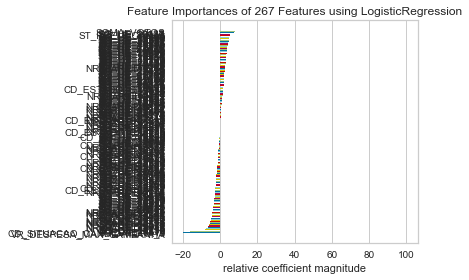

<Axes: title={'center': 'Feature Importances of 267 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [305]:
from yellowbrick.model_selection import FeatureImportances
fig = FeatureImportances(model)
fig.fit(X_train, y_train)
fig.poof()

In [306]:
# Predições
print(X.loc[[0]])
print(model.predict(X.loc[[0]])) # Classe
print(model.predict_proba(X.loc[[0]])) # Probabilidade

   VR_DESPESA_MAX_CAMPANHA    IDADE  SOMA_VOTOS  NR_PARTIDO_11  NR_PARTIDO_12  \
0                 0.039452  0.52381    0.010041              0              0   

   NR_PARTIDO_13  NR_PARTIDO_14  NR_PARTIDO_15  NR_PARTIDO_16  NR_PARTIDO_17  \
0              0              0              0              0              0   

   ...  SG_UE_22250  SG_UE_22276  SG_UE_22292  SG_UE_22314  SG_UE_22330  \
0  ...            0            0            0            0            0   

   SG_UE_22357  SG_UE_22373  SG_UE_22390  SG_UE_22411  SG_UE_22438  
0            0            0            0            0            0  

[1 rows x 267 columns]
[0]
[[0.82361262 0.17638738]]


In [307]:
r = {
    'metodo': 'logit',
    'resultados': model,
    'escala': stats,
    'acuracia': model.score(X_test, y_test)
}

import pickle
filename = 'modelo_eleicao_municipal.pkl'
pickle.dump(r, open(filename, "wb"))

,NR_PARTIDO,CD_GENERO,CD_ESTADO_CIVIL,CD_COR_RACA,ST_REELEICAO,CD_SITUACAO_CANDIDATURA,VR_DESPESA_MAX_CAMPANHA,IDADE,STATUS_ELEICAO,SG_UE,SOMA_VOTOS
0,25,2,3,3,N,12,12307.75,65,0,19879,77
1,23,2,3,1,N,12,12307.75,68,0,19550,88
2,12,4,3,1,N,12,12307.75,45,0,19305,34
3,45,2,1,1,N,12,12307.75,38,1,19160,257
4,13,2,1,2,N,12,15951.59,29,0,19992,20
...,...,...,...,...,...,...,...,...,...,...,...
10764,25,2,3,2,N,12,12307.75,36,1,21199,626
10765,40,4,1,2,N,12,20204.14,31,0,19755,99
10766,18,4,3,1,N,12,18726.81,30,0,19313,323
10767,40,2,3,3,N,12,12307.75,37,1,19739,271
